<a href="https://colab.research.google.com/github/AkshatDev2057/dc-mini-project-sg-1/blob/main/ME24B003_Copy_of_DCTask_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)  #The findFiles function uses glob.glob to find files matching a specified pattern.

print(findFiles('data.zip'))
!unzip data.zip

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):   #The unicodeToAscii function converts Unicode strings to ASCII, removing diacritics and non-ASCII characters.
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) #Normalization form decomposition
        if unicodedata.category(c) != 'Mn' #The list comprehension filters out characters that are diacritical marks
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n') #The file is opened with UTF-8 encoding, read into a single string, stripped of leading and trailing whitespace, and split into lines.
    return [unicodeToAscii(line) for line in lines]  #returns the lines in ASCII format.

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)


['data.zip']
Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  
Slusarski


In [4]:
all_categories

['Irish',
 'Czech',
 'French',
 'Russian',
 'Polish',
 'Korean',
 'Portuguese',
 'Dutch',
 'Chinese',
 'German',
 'Scottish',
 'Italian',
 'Japanese',
 'Greek',
 'English',
 'Spanish',
 'Arabic',
 'Vietnamese']

In [5]:
category_lines

{'Irish': ['Adam',
  'Ahearn',
  'Aodh',
  'Aodha',
  'Aonghuis',
  'Aonghus',
  'Bhrighde',
  'Bradach',
  'Bradan',
  'Braden',
  'Brady',
  'Bran',
  'Brannon',
  'Brian',
  'Callaghan',
  'Caomh',
  'Carey',
  'Casey',
  'Cassidy',
  'Cathain',
  'Cathan',
  'Cathasach',
  'Ceallach',
  'Ceallachan',
  'Cearbhall',
  'Cennetig',
  'Ciardha',
  'Clark',
  'Cleirich',
  'Cleirigh',
  'Cnaimhin',
  'Coghlan',
  'Coilean',
  'Collins',
  'Colman',
  'Conall',
  'Conchobhar',
  'Conn',
  'Connell',
  'Connolly',
  'Cormac',
  'Corraidhin',
  'Cuidightheach',
  'Curran',
  'Dubhshlaine',
  'Dalach',
  'Daly',
  'Damhain',
  'Damhan',
  'Delaney',
  'Desmond',
  'Devin',
  'Diarmaid',
  'Doherty',
  'Domhnall',
  'Donnchadh',
  'Donndubhan',
  'Donnell',
  'Donoghue',
  'Donovan',
  'Doyle',
  'Dubhain',
  'Dubhan',
  'Duncan',
  'Eoghan',
  'Eoin',
  'Eoin',
  'Faolan',
  'Farrell',
  'Fearghal',
  'Fergus',
  'Finn',
  'Finnegan',
  'Fionn',
  'Flanagan',
  'Flann',
  'Flynn',
  'Gallch

In [6]:
print(category_lines['Italian'][:5])


['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [7]:
print(n_letters)

57


In [8]:
print(n_categories)

18


In [9]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [10]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.i2h = nn.Parameter(torch.randn(self.hidden_size, self.input_size))
        self.h2h = nn.Parameter(torch.randn(self.hidden_size, self.hidden_size))
        self.h2o = nn.Parameter(torch.randn(self.output_size, self.hidden_size))
        self.bias_h = nn.Parameter(torch.zeros(self.hidden_size))
        self.bias_o = nn.Parameter(torch.zeros(self.output_size))

    def forward(self, input, hidden, time_steps=1):
        if not torch.is_tensor(input) or not torch.is_tensor(hidden):
            raise ValueError("input and hidden states should be pytorch tensors")
        input = input.view(-1, self.input_size)

        hidden = torch.tanh(input @ self.i2h.t() + hidden @ self.h2h.t() + self.bias_h)
        output = F.log_softmax(hidden @ self.h2o.t() + self.bias_o, dim=1)

        return output, hidden

    def initHidden(self, batch_size=1):
        return torch.zeros(batch_size, self.hidden_size)

input_size = n_letters
hidden_size = 8
n_hidden = hidden_size
output_size = n_categories
rnn = RNN(input_size, hidden_size, output_size)


In [11]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [12]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-5.8230, -8.0860, -1.1419, -2.6539, -2.7028, -4.0085, -2.7734, -4.5269,
         -5.3280, -3.0234, -4.4262, -5.3960, -2.0992, -2.8848, -1.9338, -3.5206,
         -4.5277, -4.1780]], grad_fn=<LogSoftmaxBackward0>)


In [13]:
def categoryFromOutput(output):
    # Get the top category index from the model's output
    top_n, top_i = output.topk(1)  # Returns the highest value and its index
    category_i = top_i[0].item()   # Convert the top index tensor to a Python integer
    return all_categories[category_i], category_i  # Return the category name and its index

# Example usage: print the category name and index for the given output
print(categoryFromOutput(output))


('French', 2)


In [14]:
import random

# Function to choose a random element from a list ``l``
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Function to create a random training example
def randomTrainingExample():
    # Choose a random category (language)
    category = randomChoice(all_categories)

    # Choose a random line (name) from the chosen category
    line = randomChoice(category_lines[category])

    # Create a tensor for the category (as an index in all_categories)
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)

    # Convert the line to a tensor using the lineToTensor function
    line_tensor = lineToTensor(line)
    #line_tensor = lineToTensor(line).view(line_tensor.size(0), 1, -1)  # (seq_len, 1, input_size)"""



    #Return the category, line, and their respective tensors
    return category, line, category_tensor, line_tensor

# Loop to print 10 random training examples
for i in range(10):
    # Get a random training example
    category, line, category_tensor, line_tensor = randomTrainingExample()

    # Print the category and line
    print('category =', category, '/ line =', line)


category = Irish / line = Delaney
category = Czech / line = Chermak
category = Arabic / line = Botros
category = Vietnamese / line = Pho
category = Polish / line = Adamczak
category = Scottish / line = Taylor
category = Japanese / line = Kikuchi
category = Chinese / line = Woo
category = French / line = Roy
category = Russian / line = Juzhalin


In [15]:
criterion = nn.NLLLoss()

In [18]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden.squeeze(0))

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate (this is done instead of optimizer.step())
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [24]:
import time
import math

# Number of iterations to train
n_iters = 100000

# Print progress every ``print_every`` iterations
print_every = 5000

# Record loss for plotting every ``plot_every`` iterations
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

# Function to calculate the elapsed time since ``since`` in minutes and seconds
def timeSince(since):
    now = time.time()  # Current time
    s = now - since  # Elapsed time in seconds
    m = math.floor(s / 60)  # Convert seconds to minutes
    s -= m * 60  # Remaining seconds after converting to minutes
    return '%dm %ds' % (m, s)  # Format as "Xm Ys"

start = time.time()  # Record the start time

for iter in range(1, n_iters + 1):
    # Get a random training example: category, line, and their tensor representations
    category, line, category_tensor, line_tensor = randomTrainingExample()

    output, loss = train(category_tensor, line_tensor)

    current_loss += loss  # Accumulate the loss

    # Print ``iter`` number, loss, name and guess every ``print_every`` iterations
    if iter % print_every == 0:
        # Get the model's guess and the index of the guessed category
        guess, guess_i = categoryFromOutput(output)

        # Check if the guess is correct
        correct = '✓' if guess == category else '✗ (%s)' % category

        # Print iteration number, progress, elapsed time, loss, input line, guessed category, and correctness
        print('%d %d%% (%s) %.4f %s / %s %s' % (
            iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss average to the list of losses every ``plot_every`` iterations
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)  # Average loss over the last ``plot_every`` iterations
        current_loss = 0  # Reset current loss


5000 5% (0m 9s) 1.9461 Mcmillan / Russian ✗ (Scottish)
10000 10% (0m 18s) 0.5356 Malihoudis / Greek ✓
15000 15% (0m 27s) 1.3019 Yeon / Korean ✓
20000 20% (0m 35s) 3.5347 Rios / Chinese ✗ (Portuguese)
25000 25% (0m 44s) 2.8687 Daher / German ✗ (Arabic)
30000 30% (0m 53s) 2.1441 Sung / Vietnamese ✗ (Korean)
35000 35% (1m 2s) 1.8513 Duong / Chinese ✗ (Vietnamese)
40000 40% (1m 11s) 2.0281 Ceallachan / Scottish ✗ (Irish)
45000 45% (1m 20s) 1.5029 Hyobanshi / Italian ✗ (Japanese)
50000 50% (1m 29s) 1.4223 Toyotomi / Italian ✗ (Japanese)
55000 55% (1m 37s) 1.8623 Perevuznik / Russian ✗ (Czech)
60000 60% (1m 47s) 1.9563 Grant / Irish ✗ (Scottish)
65000 65% (1m 56s) 1.3285 Melo / Portuguese ✓
70000 70% (2m 6s) 0.3439 Kouretas / Greek ✓
75000 75% (2m 14s) 1.6005 Enoki / Italian ✗ (Japanese)
80000 80% (2m 24s) 2.3230 Guirguis / Greek ✗ (Arabic)
85000 85% (2m 32s) 0.8065 Ma / Korean ✓
90000 90% (2m 41s) 1.5216 Miao / Vietnamese ✗ (Chinese)
95000 95% (2m 49s) 0.7597 Pavlinsky / Russian ✓
100000 10

<ipython-input-25-408a85d5dee9>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)  # Set x-axis labels with rotation
<ipython-input-25-408a85d5dee9>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)  # Set y-axis labels


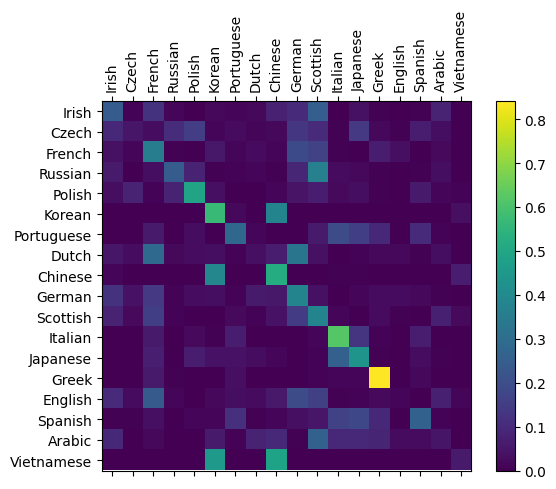

In [25]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)  # Initialize an empty confusion matrix
n_confusion = 10000  # Number of examples to evaluate for the confusion matrix

import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import matplotlib.ticker as ticker  # Importing ticker for customizing ticks

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()  # Initialize the hidden state

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden.squeeze(0))  # Pass each character in the line through the RNN

    return output  # Return the final output of the RNN

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()  # Get a random training example
    output = evaluate(line_tensor)  # Evaluate the line tensor
    guess, guess_i = categoryFromOutput(output)  # Get the guessed category and its index
    category_i = all_categories.index(category)  # Get the true category index
    confusion[category_i][guess_i] += 1  # Increment the corresponding cell in the confusion matrix

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()  # Normalize each row

# Set up plot
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111)  # Add a subplot to the figure
cax = ax.matshow(confusion.numpy())  # Display the confusion matrix as an image
fig.colorbar(cax)  # Add a color bar to the figure

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)  # Set x-axis labels with rotation
ax.set_yticklabels([''] + all_categories)  # Set y-axis labels

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set x-axis major ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))  # Set y-axis major ticks
plt.show()  # Show the plot

In [26]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


In [27]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.00) Russian
(-1.40) Czech
(-1.62) Polish

> Jackson
(-1.56) Scottish
(-1.63) Russian
(-2.38) Arabic

> Satoshi
(-0.78) Italian
(-1.25) Japanese
(-2.78) Polish
